# Spotify Music Stream Analytics

## Project Overview
This guide provides a step-by-step approach to building an advanced analytics solution using the Spotify Songs Dataset. It combines data engineering best practices, machine learning techniques, and business intelligence strategies for the hackathon competition.

Dataset: Spotify Songs Dataset (80M+ songs, 7M+ artists)

Kaggle Link: https://www.kaggle.com/datasets/maharshipandya/-spotify-tracks-dataset

Primary Goal: Build an interactive dashboard with recommendation engine and advanced insights

## DATA EXTRACTION & EXPLORATION

### Data Loading & Initial Assessment

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [4]:
# Load the Spotify dataset
df = pd.read_csv('dataset.csv')

In [5]:
# Display the shape of the DataFrame

df.shape


(114000, 21)

In [6]:
# Listing columns helps me spot weird names or typos early
df.columns

Index(['Unnamed: 0', 'track_id', 'artists', 'album_name', 'track_name',
       'popularity', 'duration_ms', 'explicit', 'danceability', 'energy',
       'key', 'loudness', 'mode', 'speechiness', 'acousticness',
       'instrumentalness', 'liveness', 'valence', 'tempo', 'time_signature',
       'track_genre'],
      dtype='object')

In [7]:
print(f"Memory usage: {df.memory_usage(deep=True).sum() / 1024**2:.2f} MB")

Memory usage: 54.31 MB


In [8]:
# Check for missing values
df.isnull().sum()


Unnamed: 0          0
track_id            0
artists             1
album_name          1
track_name          1
popularity          0
duration_ms         0
explicit            0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
time_signature      0
track_genre         0
dtype: int64

In [9]:
# fill missing values with column unknown
df.fillna('unknown', inplace=True)
# Verify no missing values remain
df.isnull().sum()

Unnamed: 0          0
track_id            0
artists             0
album_name          0
track_name          0
popularity          0
duration_ms         0
explicit            0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
time_signature      0
track_genre         0
dtype: int64

In [10]:
# Data types
print(f"\nData types:\n{df.dtypes}")


Data types:
Unnamed: 0            int64
track_id             object
artists              object
album_name           object
track_name           object
popularity            int64
duration_ms           int64
explicit               bool
danceability        float64
energy              float64
key                   int64
loudness            float64
mode                  int64
speechiness         float64
acousticness        float64
instrumentalness    float64
liveness            float64
valence             float64
tempo               float64
time_signature        int64
track_genre          object
dtype: object


In [ ]:
# Basic statistics
df.describe()

,Unnamed: 0,popularity,duration_ms,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
count,89741.000000,89741.000000,8.974100e+04,89741.000000,89741.000000,89741.000000,89741.000000,89741.000000,89741.000000,89741.000000,89741.000000,89741.000000,89741.000000,89741.000000,89741.000000
mean,53479.144148,33.198438,2.291418e+05,0.562166,0.634458,5.283549,-8.499004,0.636966,0.087442,0.328289,0.173413,0.216970,0.469477,122.058316,3.897427
std,33409.981502,20.580824,1.129477e+05,0.176691,0.256605,3.559897,5.221490,0.480877,0.113277,0.338321,0.323848,0.194884,0.262864,30.117532,0.453435
min,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,-49.531000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,23767.000000,19.000000,1.730400e+05,0.450000,0.457000,2.000000,-10.322000,0.000000,0.036000,0.017100,0.000000,0.098200,0.249000,99.264000,4.000000
50%,50681.000000,33.000000,2.132930e+05,0.576000,0.676000,5.000000,-7.185000,1.000000,0.048900,0.188000,0.000058,0.132000,0.457000,122.013000,4.000000
75%,80618.000000,49.000000,2.642930e+05,0.692000,0.853000,8.000000,-5.108000,1.000000,0.085900,0.625000,0.097600,0.279000,0.682000,140.077000,4.000000
max,113999.000000,100.000000,5.237295e+06,0.985000,1.000000,11.000000,4.532000,1.000000,0.965000,0.996000,1.000000,1.000000,0.995000,243.372000,5.000000


In [17]:
# Print column information
print("\n=== COLUMN REFERENCE ===")
columns_info = {
    'track_id': 'Unique track identifier',
    'artists': 'Artist names (comma-separated)',
    'album_name': 'Album name',
    'track_name': 'Song title',
    'popularity': '0-100 scale (KEY METRIC)',
    'duration_ms': 'Track duration in milliseconds',
    'explicit': 'Boolean (True/False)',
    'danceability': '0-1 scale',
    'energy': '0-1 scale',
    'key': '0-11 (musical key)',
    'loudness': 'dB value (negative)',
    'mode': '0=Minor, 1=Major',
    'speechiness': '0-1 scale',
    'acousticness': '0-1 scale',
    'instrumentalness': '0-1 scale',
    'liveness': '0-1 scale',
    'valence': '0-1 scale (mood)',
    'tempo': 'BPM',
    'time_signature': 'Beats per measure',
    'track_genre': 'Genre/Category'
}

for col, desc in columns_info.items():
    if col in df.columns:
        print(f"✓ {col}: {desc}")
    else:
        print(f"✗ {col}: NOT FOUND")



=== COLUMN REFERENCE ===
✓ track_id: Unique track identifier
✓ artists: Artist names (comma-separated)
✓ album_name: Album name
✓ track_name: Song title
✓ popularity: 0-100 scale (KEY METRIC)
✓ duration_ms: Track duration in milliseconds
✓ explicit: Boolean (True/False)
✓ danceability: 0-1 scale
✓ energy: 0-1 scale
✓ key: 0-11 (musical key)
✓ loudness: dB value (negative)
✓ mode: 0=Minor, 1=Major
✓ speechiness: 0-1 scale
✓ acousticness: 0-1 scale
✓ instrumentalness: 0-1 scale
✓ liveness: 0-1 scale
✓ valence: 0-1 scale (mood)
✓ tempo: BPM
✓ time_signature: Beats per measure
✓ track_genre: Genre/Category


## DATA CLEANING & TRANSFORMATION

### Handle Missing Values

In [18]:
# Check for any missing values (should be minimal)
print(f"Total missing values: {df.isnull().sum().sum()}")
print(f"Percentage: {(df.isnull().sum().sum() / (df.shape[0] * df.shape[1])) * 100:.2f}%")

Total missing values: 0
Percentage: 0.00%


In [19]:
# Remove any duplicate tracks
df = df.drop_duplicates(subset=['track_id'], keep='first')
print(f"\nAfter removing duplicates: {df.shape}")


After removing duplicates: (89741, 21)


In [20]:
# Remove rows with missing critical values
df = df.dropna(subset=['popularity', 'track_genre', 'track_id'])
print(f"After removing nulls in critical columns: {df.shape}")

After removing nulls in critical columns: (89741, 21)


In [22]:
# Strategy 3: Handle outliers in numeric features
numeric_cols = ['acousticness', 'danceability', 'energy', 'valence', 
                'loudness', 'tempo', 'speechiness', 'instrumentalness']

for col in numeric_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    # Keep outliers but note them
    outliers = df[(df[col] < Q1 - 1.5*IQR) | (df[col] > Q3 + 1.5*IQR)]
    print(f"{col}: {len(outliers)} outliers")

acousticness: 0 outliers
danceability: 474 outliers
energy: 0 outliers
valence: 0 outliers
loudness: 5026 outliers
tempo: 514 outliers
speechiness: 10644 outliers
instrumentalness: 19613 outliers


## Data Type Conversions

In [23]:
# Ensure correct data types
df['track_id'] = df['track_id'].astype(str)
df['artists'] = df['artists'].astype(str)
df['album_name'] = df['album_name'].astype(str)
df['track_name'] = df['track_name'].astype(str)
df['popularity'] = pd.to_numeric(df['popularity'], errors='coerce')
df['duration_ms'] = pd.to_numeric(df['duration_ms'], errors='coerce')
df['explicit'] = df['explicit'].astype(bool)
df['track_genre'] = df['track_genre'].astype(str)

In [24]:
# Audio features should be float
audio_features = ['danceability', 'energy', 'key', 'loudness', 'mode',
                  'speechiness', 'acousticness', 'instrumentalness',
                  'liveness', 'valence', 'tempo', 'time_signature']

for col in audio_features:
    df[col] = pd.to_numeric(df[col], errors='coerce')

print("✓ Data types converted successfully")

✓ Data types converted successfully


### Feature Engineering

In [25]:
# Duration in minutes
df['duration_minutes'] = df['duration_ms'] / 60000

In [27]:
# Popularity categories
df['popularity_category'] = pd.cut(df['popularity'], 
                                    bins=[0, 40, 70, 100], 
                                    labels=['Low', 'Medium', 'High'])

In [28]:
df['popularity_tier'] = pd.cut(df['popularity'],
                               bins=[0, 20, 40, 60, 80, 100],
                               labels=['Very Low', 'Low', 'Medium', 'High', 'Very High'])

In [29]:
# Duration categories
df['duration_category'] = pd.cut(df['duration_minutes'],
                                 bins=[0, 3, 4, 5, 1000],
                                 labels=['Short (<3 min)', 'Medium (3-4 min)', 
                                        'Long (4-5 min)', 'Very Long (>5 min)'])

In [30]:
# Energy level
df['energy_level'] = pd.cut(df['energy'],
                            bins=[0, 0.4, 0.6, 0.8, 1.0],
                            labels=['Low Energy', 'Moderate Energy', 
                                   'High Energy', 'Very High Energy'])

In [31]:
# Danceability
df['danceability_level'] = pd.cut(df['danceability'],
                                  bins=[0, 0.3, 0.5, 0.7, 1.0],
                                  labels=['Not Danceable', 'Moderately Danceable',
                                         'Danceable', 'Very Danceable'])

In [32]:
# Acousticness
df['acoustic_type'] = pd.cut(df['acousticness'],
                             bins=[0, 0.3, 0.5, 1.0],
                             labels=['Electronic', 'Semi-Acoustic', 'Acoustic'])

In [33]:
# Valence (mood)
df['valence_category'] = pd.cut(df['valence'],
                                bins=[0, 0.3, 0.5, 0.7, 1.0],
                                labels=['Sad/Dark', 'Neutral', 'Positive', 'Very Positive'])

In [34]:
# Instrumentalness
df['instrumentalness_category'] = pd.cut(df['instrumentalness'],
                                         bins=[0, 0.1, 0.5, 1.0],
                                         labels=['Vocal-Focused', 'Some Instruments',
                                                'Mostly Instrumental'])

In [35]:
# Tempo
df['tempo_category'] = pd.cut(df['tempo'],
                              bins=[0, 60, 100, 140, 300],
                              labels=['Slow', 'Moderate', 'Fast', 'Very Fast'])

In [36]:
# Explicit flag
df['is_explicit'] = df['explicit'].map({True: 'Explicit', False: 'Clean'})

In [37]:
# Artist count (comma-separated)
df['artist_count'] = df['artists'].str.count(',') + 1

In [38]:
# Is collaborative
df['is_collaborative'] = df['artist_count'] > 1

In [39]:
# Audio profile summary
df['audio_summary'] = (df['energy'].apply(lambda x: 'Energetic' if x > 0.5 else 'Calm') + ', ' +
                       df['danceability'].apply(lambda x: 'Danceable' if x > 0.5 else 'Not Danceable') + ', ' +
                       df['valence'].apply(lambda x: 'Positive' if x > 0.5 else 'Melancholic'))

In [40]:
# Playlist fit score (0-100)
df['playlist_fit_score'] = (
    (df['popularity'] / 100 * 30) +
    (df['danceability'] > 0.6).astype(int) * 15 +
    (df['valence'] > 0.5).astype(int) * 15 +
    (df['energy'] > 0.6).astype(int) * 20 +
    (df['acousticness'] < 0.4).astype(int) * 15 +
    (df['explicit'] == False).astype(int) * 5
).clip(0, 100)

print("✓ Features engineered successfully")
print(f"New columns: {df.shape[1]} (was {len(columns_info)})")

✓ Features engineered successfully
New columns: 36 (was 20)


## EXPLORATORY DATA ANALYSIS

###  Univariate Analysis

Text(0, 0.5, 'Count')

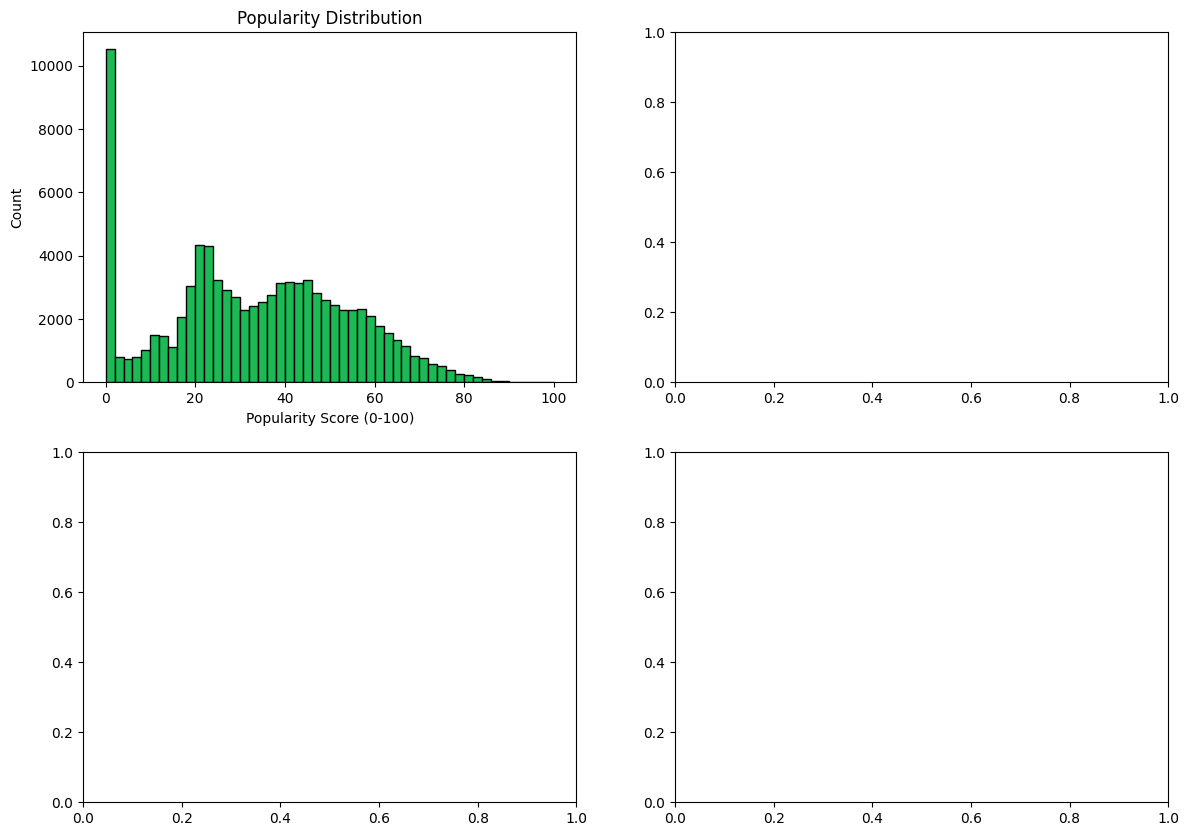

In [ ]:
# Popularity distribution
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

axes[0, 0].hist(df['popularity'], bins=50, edgecolor='black', color='#1DB954')
axes[0, 0].set_title('Popularity Distribution')
axes[0, 0].set_xlabel('Popularity Score (0-100)')
axes[0, 0].set_ylabel('Count')

# Energy distribution
axes[0, 1].hist(df['energy'], bins=50, edgecolor='black', color='#1DB954')
axes[0, 1].set_title('Energy Distribution')
axes[0, 1].set_xlabel('Energy (0-1)')
axes[0, 1].set_ylabel('Count')

# Danceability distribution
axes[1, 0].hist(df['danceability'], bins=50, edgecolor='black', color='#1DB954')
axes[1, 0].set_title('Danceability Distribution')
axes[1, 0].set_xlabel('Danceability (0-1)')
axes[1, 0].set_ylabel('Count')

# Valence distribution
axes[1, 1].hist(df['valence'], bins=50, edgecolor='black', color='#1DB954')
axes[1, 1].set_title('Valence (Mood) Distribution')
axes[1, 1].set_xlabel('Valence (0-1)')
axes[1, 1].set_ylabel('Count')

plt.tight_layout()
plt.savefig('distributions.png', dpi=300, bbox_inches='tight')
plt.show()

In [ ]:
# Summary statistics
print("\n=== POPULARITY STATISTICS ===")
print(df['popularity'].describe())
print(f"Mean: {df['popularity'].mean():.2f}")
print(f"Median: {df['popularity'].median():.2f}")
print(f"Std Dev: {df['popularity'].std():.2f}")

### Genre Analysis

In [ ]:
# Top genres
top_genres = df['track_genre'].value_counts().head(20)
print("\n=== TOP 20 GENRES ===")
print(top_genres)

In [ ]:
# Visualize
plt.figure(figsize=(12, 6))
top_genres.plot(kind='barh', color='#1DB954')
plt.title('Top 20 Genres by Track Count')
plt.xlabel('Number of Tracks')
plt.tight_layout()
plt.savefig('top_genres.png', dpi=300, bbox_inches='tight')
plt.show()

In [ ]:
# Genre statistics
print("\n=== GENRE STATISTICS ===")
genre_stats = df.groupby('track_genre').agg({
    'track_id': 'count',
    'popularity': ['mean', 'median', 'std'],
    'energy': 'mean',
    'danceability': 'mean',
    'valence': 'mean'
}).round(2)
genre_stats.columns = ['Track_Count', 'Avg_Pop', 'Median_Pop', 'Pop_StdDev', 
                       'Avg_Energy', 'Avg_Danceability', 'Avg_Valence']
genre_stats = genre_stats.sort_values('Track_Count', ascending=False)
print(genre_stats.head(15))

### Audio Features Correlation

In [ ]:
# Correlation matrix
audio_features = ['popularity', 'danceability', 'energy', 'acousticness',
                 'instrumentalness', 'liveness', 'loudness', 'speechiness',
                 'tempo', 'valence']

corr_matrix = df[audio_features].corr()

In [ ]:
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='RdYlGn', center=0, 
            square=True, linewidths=1, cbar_kws={"shrink": 0.8})
plt.title('Audio Features Correlation Matrix')
plt.tight_layout()
plt.savefig('correlation_matrix.png', dpi=300, bbox_inches='tight')
plt.show()

In [ ]:
# Print correlations with popularity
print("\n=== POPULARITY CORRELATIONS ===")
pop_corr = df[audio_features].corr()['popularity'].sort_values(ascending=False)
print(pop_corr)

### Artist Analysis

In [ ]:
# Artist counts
artist_df = df.groupby('artists').agg({
    'track_id': 'count',
    'popularity': ['mean', 'max'],
    'energy': 'mean',
    'danceability': 'mean'
}).round(2)
artist_df.columns = ['Track_Count', 'Avg_Pop', 'Max_Pop', 'Avg_Energy', 'Avg_Dance']
artist_df = artist_df.sort_values('Track_Count', ascending=False)

print("\n=== TOP 20 ARTISTS (BY TRACK COUNT) ===")
print(artist_df.head(20))

In [ ]:
# Artist tier classification
def classify_artist_tier(track_count):
    if track_count >= 100:
        return 'Superstar'
    elif track_count >= 50:
        return 'Established'
    elif track_count >= 10:
        return 'Growth'
    else:
        return 'Emerging'

artist_df['artist_tier'] = artist_df['Track_Count'].apply(classify_artist_tier)

print("\n=== ARTIST TIER DISTRIBUTION ===")
print(artist_df['artist_tier'].value_counts())

## RECOMMENDATION ENGINE